#**Churn Prediction**

##**Performing EDA**

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data and storing it in "data"

data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
#checking null values and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Dropping "customerID" column because it is constant
data1=data.drop('customerID',axis=1)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Checking Duplicates
data1.duplicated().sum()

np.int64(22)

In [7]:
#Columns and Rows of dataset
data1.shape

(7043, 20)

In [8]:
#Dropping duplicate and storing it into "data1" variable

data1=data1.drop_duplicates()
data1.shape

(7021, 20)

In [9]:
#Resetting Index
data1.reset_index(drop=True,inplace=True)

In [10]:
#Checking Value_Counts

data1['MultipleLines'].value_counts()

,count
MultipleLines,
No,3368
Yes,2971
No phone service,682


In [11]:
data1['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2777
Yes,2732
No internet service,1512


In [12]:
data1['StreamingTV'].value_counts()

,count
StreamingTV,
No,2802
Yes,2707
No internet service,1512


In [13]:
data1['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3087
Yes,2422
No internet service,1512


In [14]:
data1['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3080
Yes,2429
No internet service,1512


In [15]:
data1['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3490
Yes,2019
No internet service,1512


In [16]:
data1['TechSupport'].value_counts()

,count
TechSupport,
No,3465
Yes,2044
No internet service,1512


In [17]:
#Rplacing "No internet service" to "No" and "No phone service" to 'No'

replace_cols=['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in replace_cols:
    data1[i]=data1[i].replace({'No internet service': 'No', 'No phone service': 'No'})

In [18]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7017,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7018,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7019,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [20]:
#changing to correct dtype
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'], errors='coerce')

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [22]:
#Filling Null values with Median
data1['TotalCharges'].fillna(data1['TotalCharges'].median(), inplace=True)


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [24]:
data1['SeniorCitizen'] = data1['SeniorCitizen'].astype('object')

In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


##**Visualisation**

<Axes: xlabel='gender', ylabel='tenure'>

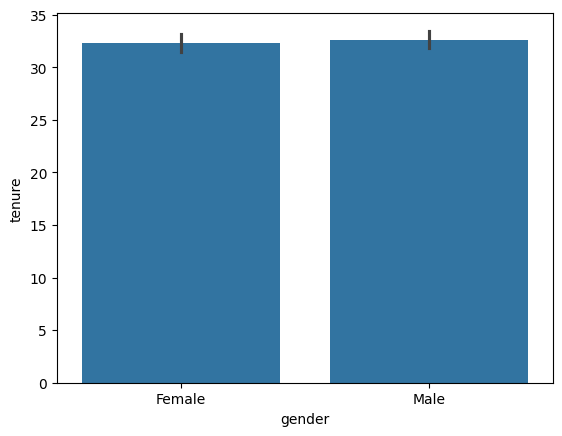

In [26]:
sns.barplot(x='gender',y='tenure',data=data1)

<Axes: xlabel='gender', ylabel='tenure'>

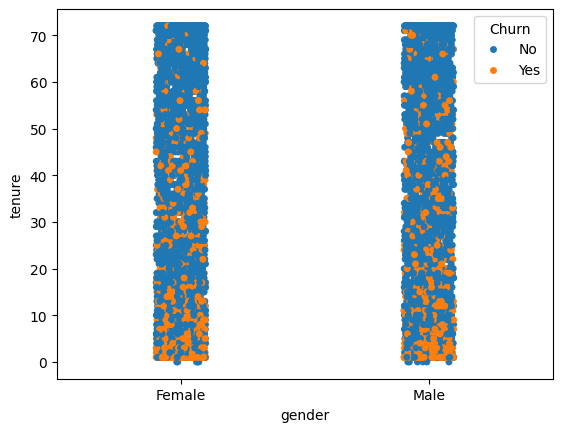

In [27]:
sns.stripplot(x='gender',y='tenure',data=data1,hue='Churn',jitter=True,size=5)

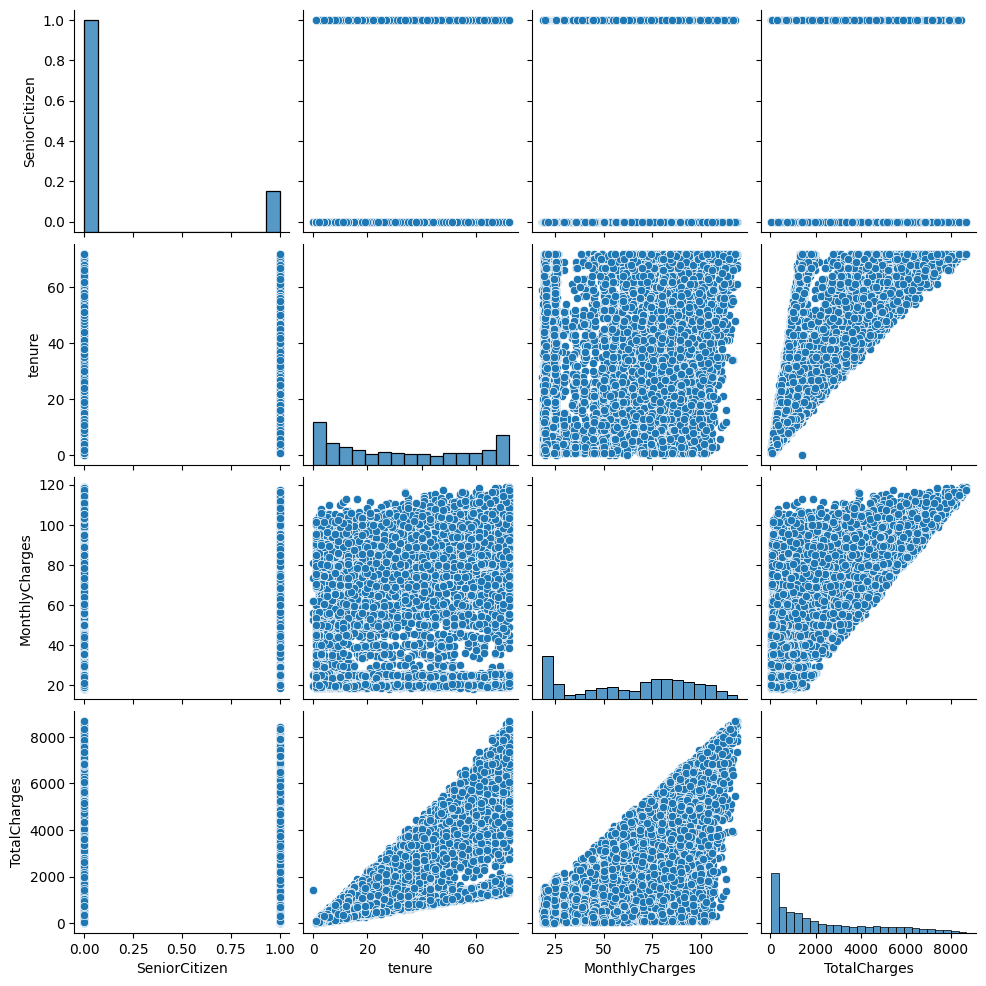

In [28]:
sns.pairplot(data1)

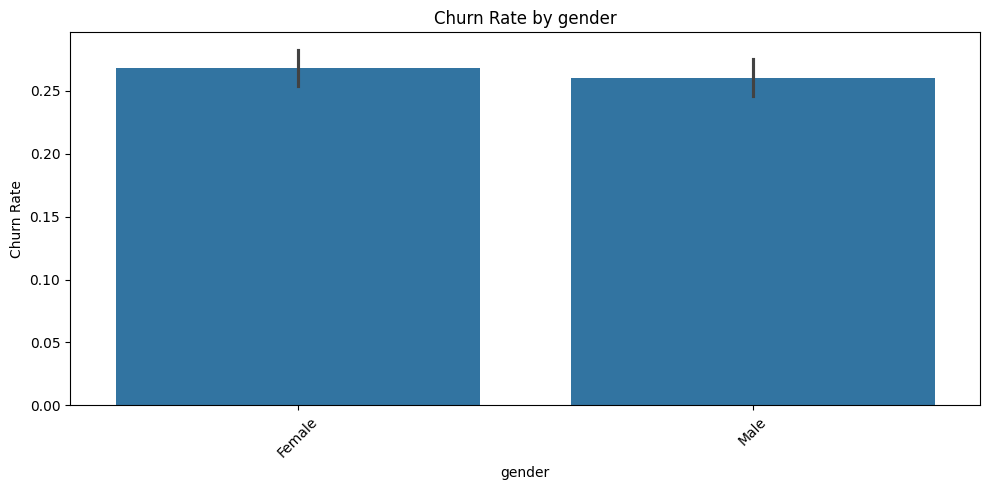

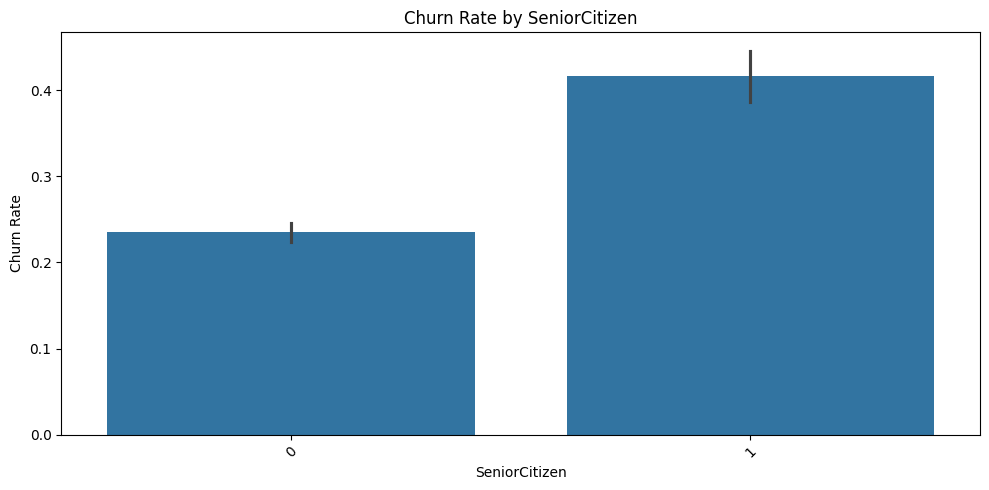

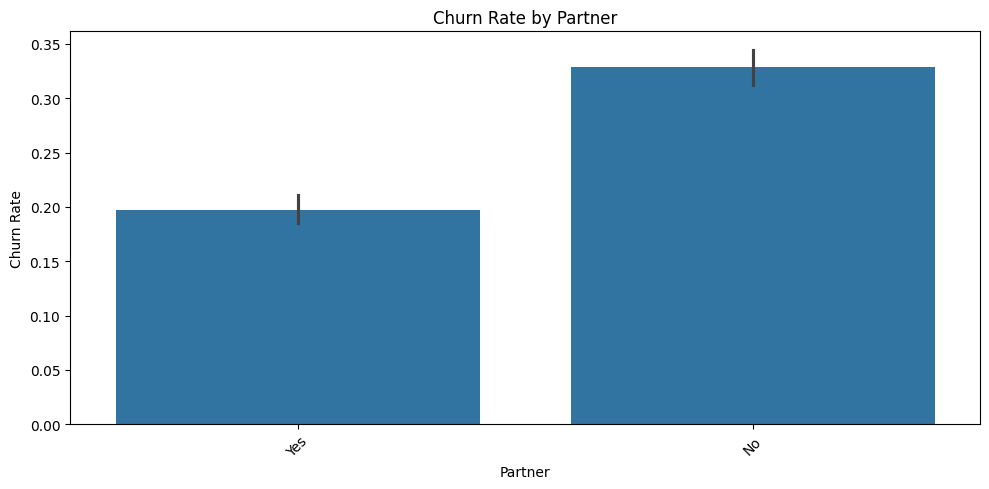

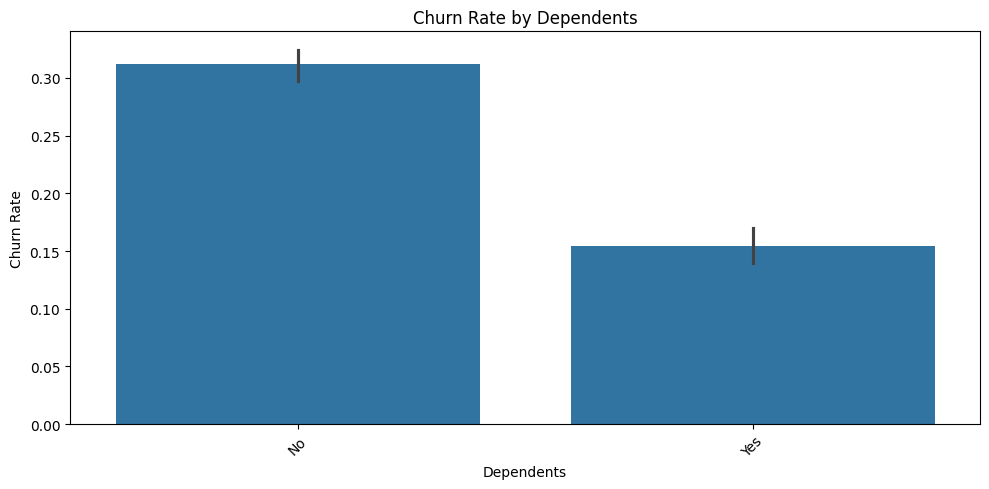

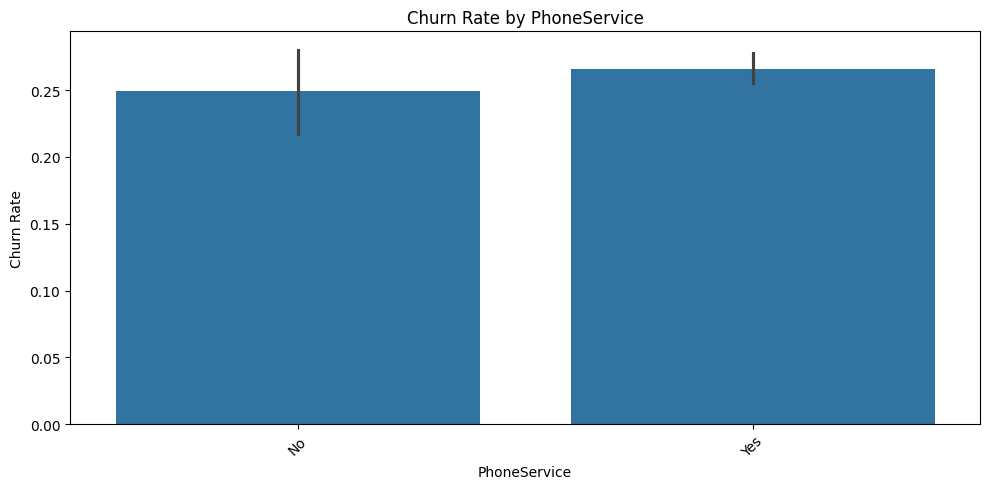

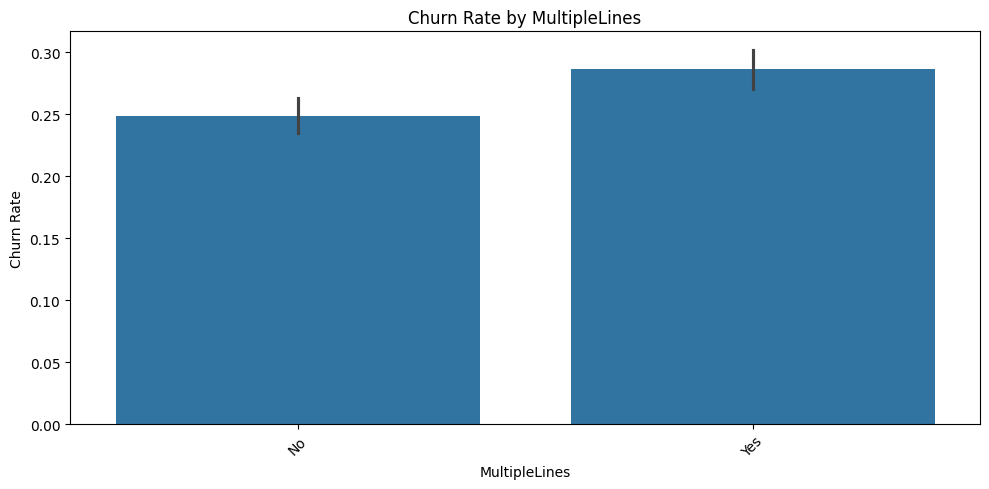

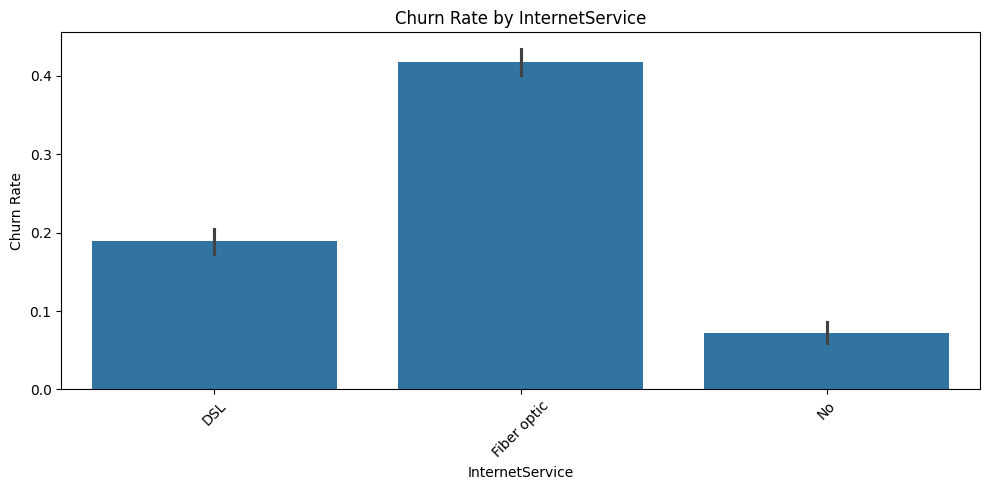

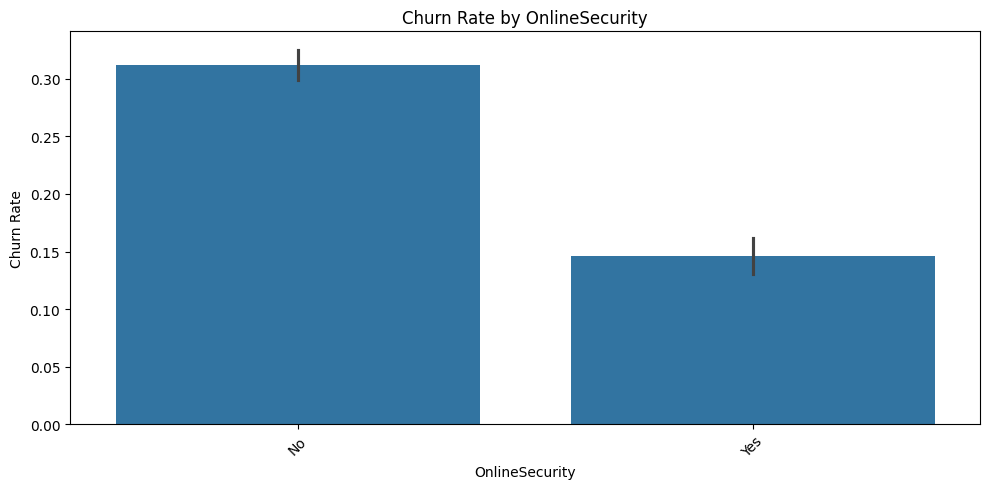

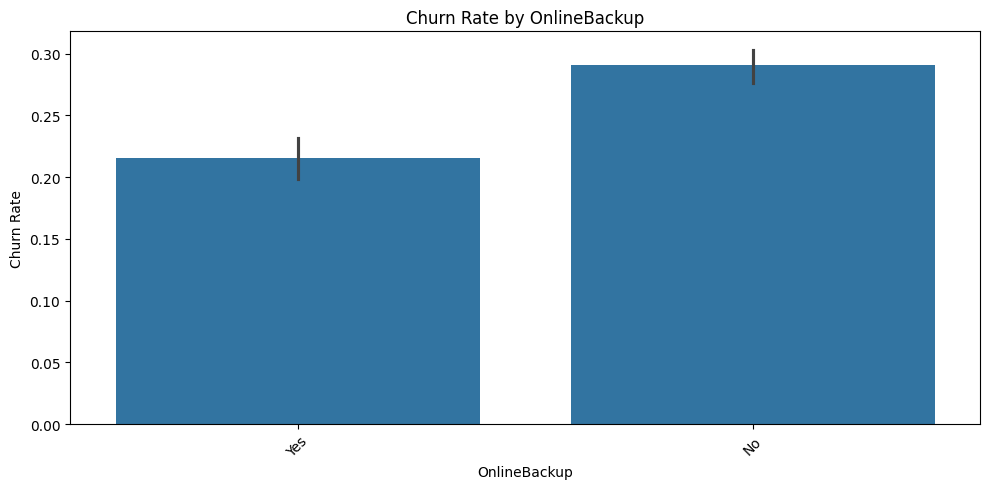

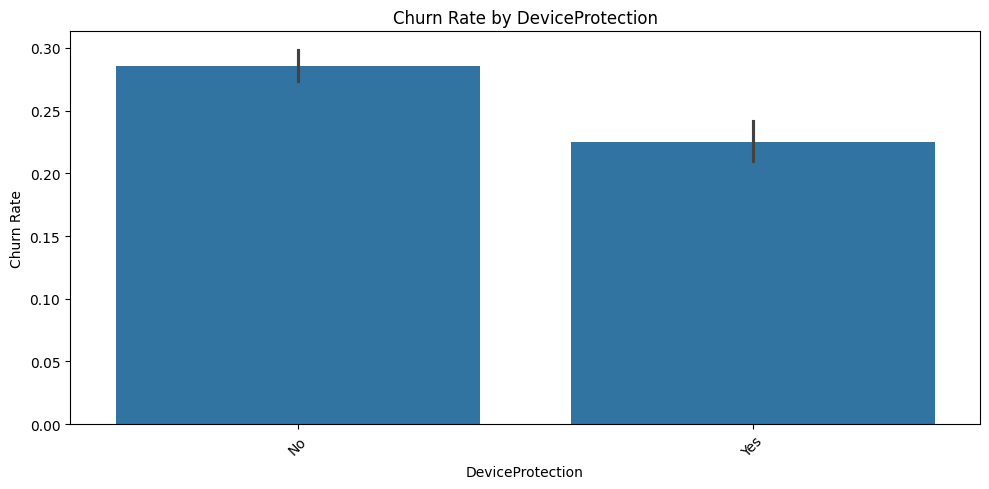

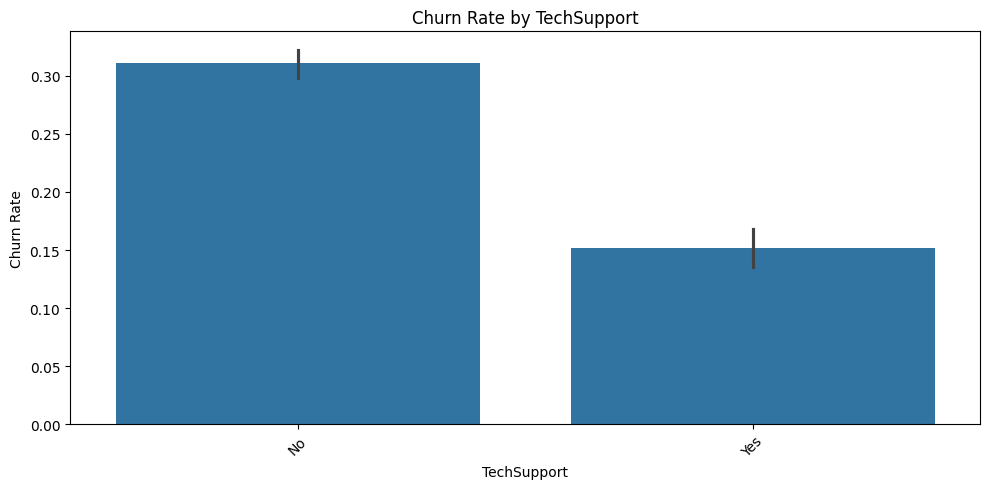

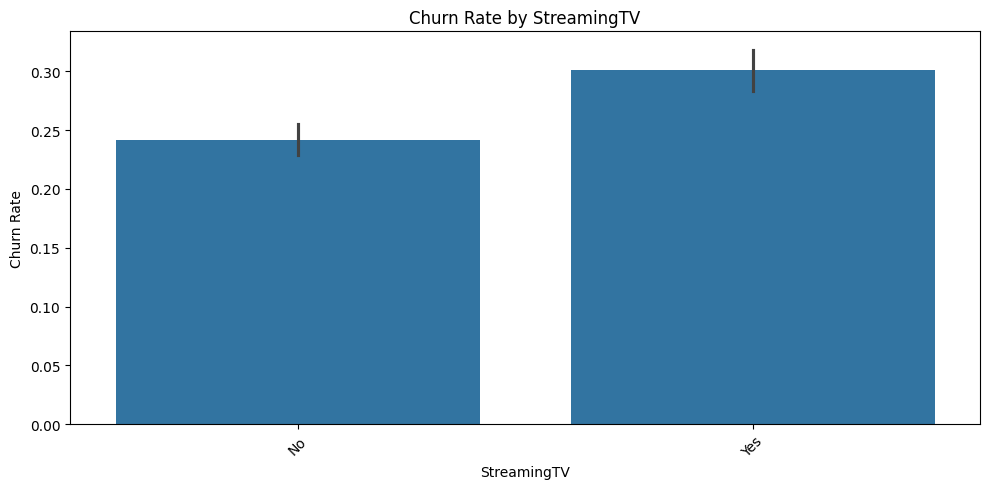

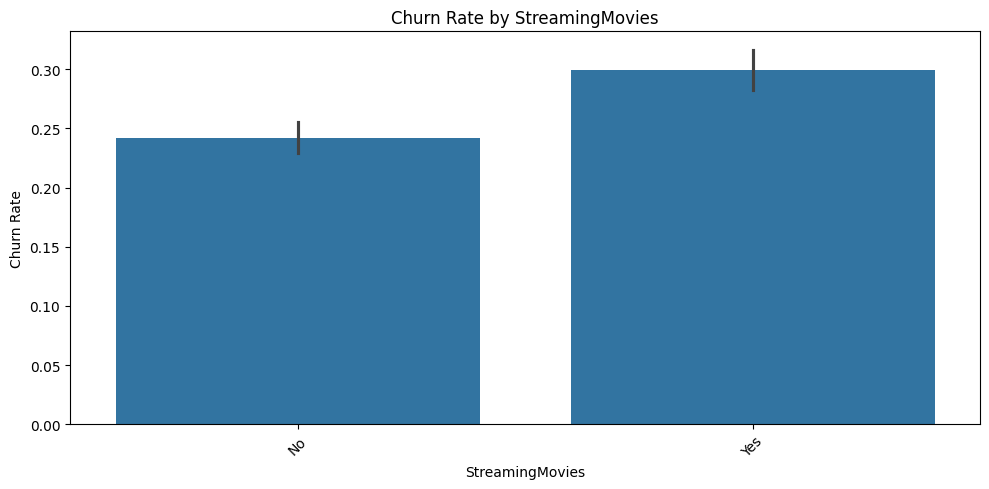

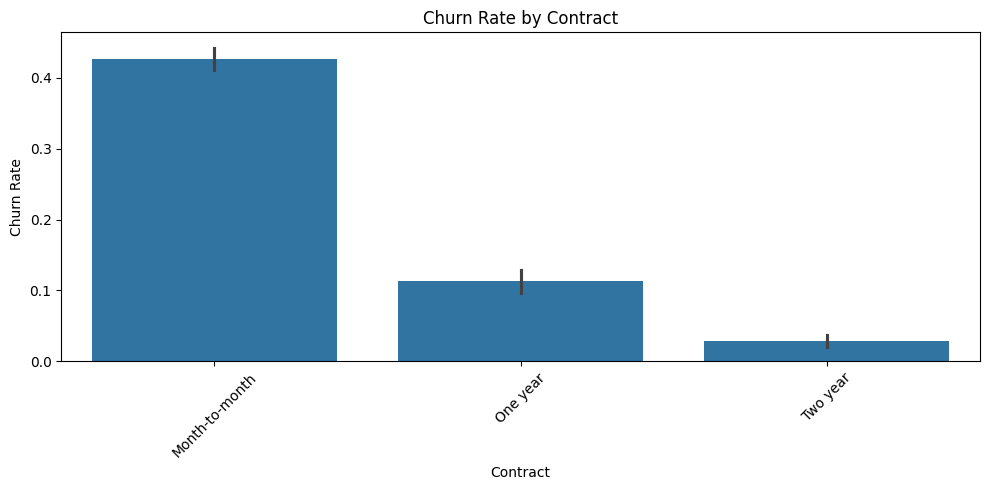

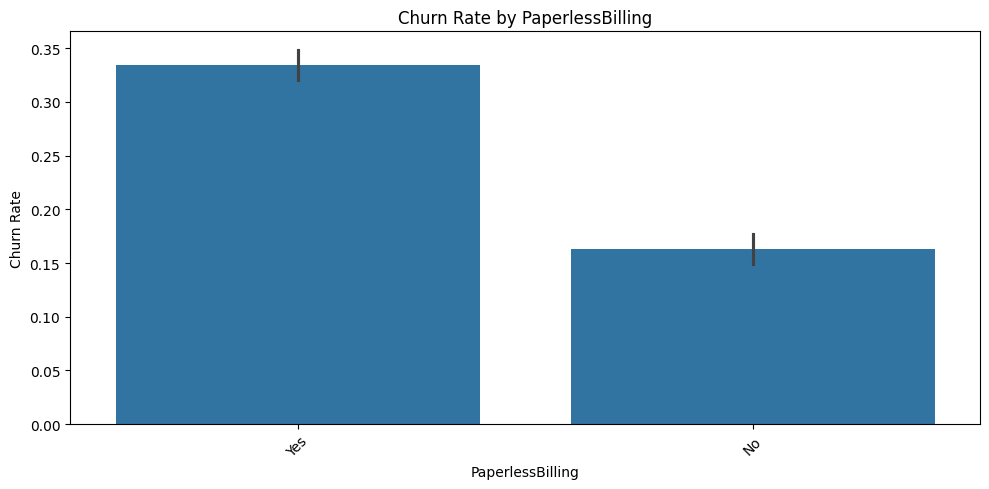

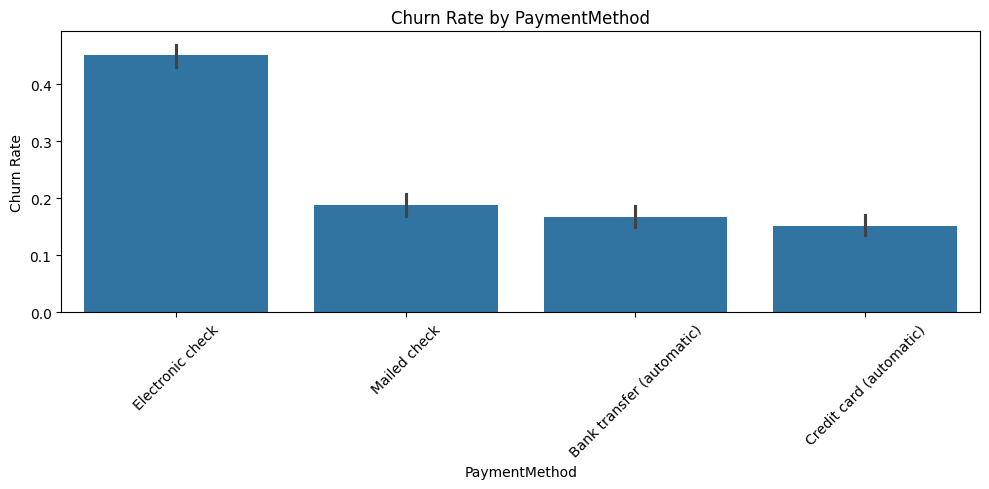

In [29]:
categorical_cols = data1.select_dtypes(include='object').columns.tolist()
# Remove ID and target column
categorical_cols = [col for col in categorical_cols if col not in ['Churn']]

data1['Churn_numeric'] = data1['Churn'].map({'Yes': 1, 'No': 0})



for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='Churn_numeric', data=data1)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



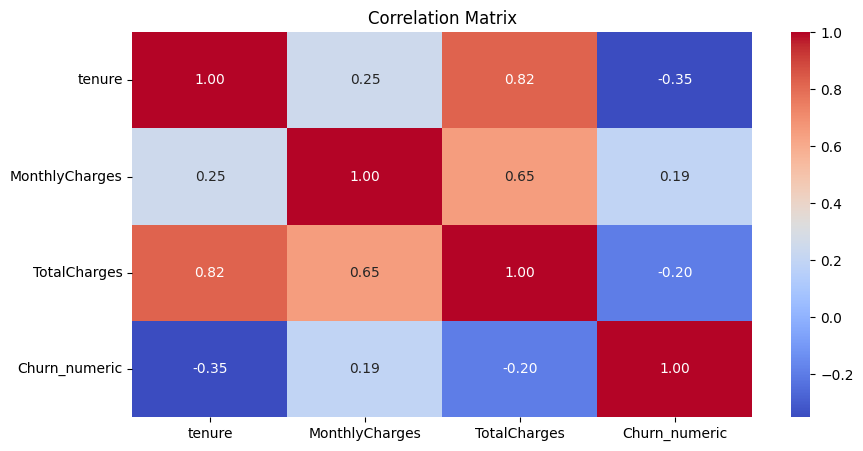

In [30]:
# 1. Computing correlations
corr = data1[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']].corr()

# 2. Ploting heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


<Axes: >

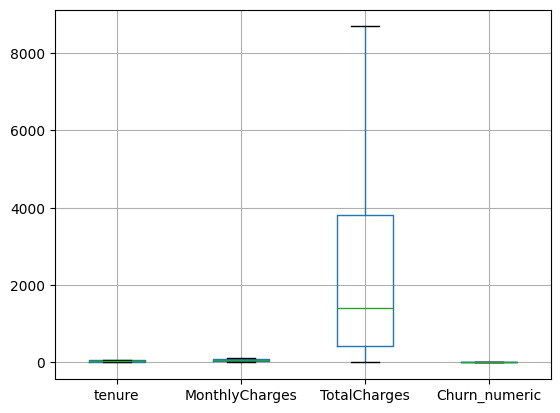

In [31]:
data1.boxplot()


##**Encoding**

In [32]:
from sklearn.preprocessing import StandardScaler

# Drop churn (already encoded)
categorical_cols = [col for col in data1.select_dtypes(include='object').columns if col not in ['Churn']]

# One-hot encode
data_encoded = pd.get_dummies(data1, columns=categorical_cols, drop_first=True)


In [33]:
data_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Churn_numeric,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,No,0,True,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,No,0,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,2,70.70,151.65,Yes,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [34]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7021 non-null   int64  
 1   MonthlyCharges                         7021 non-null   float64
 2   TotalCharges                           7021 non-null   float64
 3   Churn                                  7021 non-null   object 
 4   Churn_numeric                          7021 non-null   int64  
 5   gender_Male                            7021 non-null   bool   
 6   SeniorCitizen_1                        7021 non-null   bool   
 7   Partner_Yes                            7021 non-null   bool   
 8   Dependents_Yes                         7021 non-null   bool   
 9   PhoneService_Yes                       7021 non-null   bool   
 10  MultipleLines_Yes                      7021 non-null   bool   
 11  Inte

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Identify numerical columns (excluding target)
numerical_cols = [col for col in data_encoded.select_dtypes(include='number').columns if col != 'Churn_numeric']

# Step 2: Scale only numerical columns
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])


In [36]:
data_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Churn_numeric,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.001275,No,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,0.215867,No,0,True,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
2,0.027778,0.354229,0.010310,Yes,1,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,0.625000,0.239303,0.210241,No,0,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0.027778,0.521891,0.015330,Yes,1,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [37]:
data_encoded.drop('Churn', axis=1, inplace=True)

In [38]:
X = data_encoded.drop('Churn_numeric', axis=1)
y = data_encoded['Churn_numeric']

In [39]:
X

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.001275,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,0.215867,True,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2,0.027778,0.354229,0.010310,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.625000,0.239303,0.210241,True,False,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0.027778,0.521891,0.015330,False,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,0.333333,0.662189,0.227521,True,False,True,True,True,True,False,...,True,True,True,True,True,False,True,False,False,True
7017,1.000000,0.845274,0.847461,False,False,True,True,True,True,True,...,True,False,True,True,True,False,True,True,False,False
7018,0.152778,0.112935,0.037809,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7019,0.055556,0.558706,0.033210,True,True,True,False,True,True,True,...,False,False,False,False,False,False,True,False,False,True


In [40]:
y

,Churn_numeric
0,0
1,0
2,1
3,0
4,1
...,...
7016,0
7017,0
7018,0
7019,1


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


##**Model Building and Evaluation**

##**First Model**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg=LogisticRegression()
model1=log_reg.fit(X_train_res,y_train_res)
pred1=model1.predict(X_test)

print(accuracy_score(y_test,pred1))

print(classification_report(y_test,pred1))

print(confusion_matrix(y_test,pred1))


0.7572953736654804
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1053
           1       0.51      0.78      0.62       352

    accuracy                           0.76      1405
   macro avg       0.71      0.77      0.72      1405
weighted avg       0.81      0.76      0.77      1405

[[789 264]
 [ 77 275]]


##**Second Model**

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (e.g., keep 95% variance)
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original features: {X_train.shape[1]}")
print(f"Reduced features after PCA: {X_train_pca.shape[1]}")


Original features: 23
Reduced features after PCA: 15


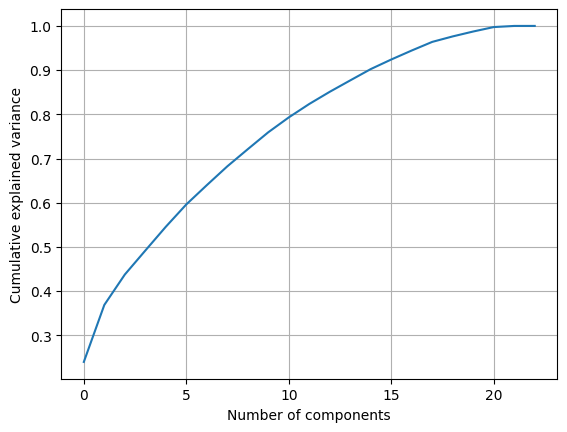

In [46]:
import matplotlib.pyplot as plt

pca2 = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))
print(confusion_matrix(y_test, y_pred_pca))


Accuracy: 0.8064056939501779
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1053
           1       0.63      0.56      0.59       352

    accuracy                           0.81      1405
   macro avg       0.74      0.72      0.73      1405
weighted avg       0.80      0.81      0.80      1405

[[937 116]
 [156 196]]


##**Third Model**

In [48]:
# Calculate imbalance ratio

from xgboost import XGBClassifier


scale_weight = (y_train_res == 0).sum() / (y_train_res == 1).sum()

xgb_weighted = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_weight
)

xgb_weighted.fit(X_train_pca, y_train)
pred_weighted = xgb_weighted.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, pred_weighted))
print(classification_report(y_test, pred_weighted))
print(confusion_matrix(y_test, pred_weighted))

Accuracy: 0.7729537366548043
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1053
           1       0.55      0.49      0.52       352

    accuracy                           0.77      1405
   macro avg       0.69      0.68      0.68      1405
weighted avg       0.76      0.77      0.77      1405

[[915 138]
 [181 171]]


##**Fourth Model**

In [49]:
# GridSearch with Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train_pca, y_train)

best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test_pca)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest Accuracy: 0.7914590747330961
[[935 118]
 [175 177]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1053
           1       0.60      0.50      0.55       352

    accuracy                           0.79      1405
   macro avg       0.72      0.70      0.71      1405
weighted avg       0.78      0.79      0.79      1405



####After building and evaluating four machine learning models for customer churn prediction, I selected **Model 2: Logistic Regression with PCA (Principal Component Analysis)** as the final model for deployment.

* Model 2 achieved the highest accuracy of 80.6% on the test data.

* This indicates that the model makes correct predictions more consistently compared to the other models.

* Model 2 shows a more balanced tradeoff between precision and recall for the positive class (churners), which is critical in churn problems.
   * Precision (churners): 0.63 → Out of predicted churners, 63% were correct.

   * Recall (churners): 0.56 → It detected 56% of actual churners.

  *  F1-Score: 0.59 → A good harmonic mean of precision and recall.

  * While Model 1 had higher recall (78%), its precision was too low (51%), meaning many false alarms — not ideal in business settings.

* Logistic Regression is a lightweight and interpretable model, ideal for explaining results to stakeholders.

* Adding PCA helped reduce dimensionality, combat multicollinearity, and simplify the model without heavy accuracy loss.

* Faster training and prediction time than ensemble models like Random Forest and XGBoost.

* Easier to deploy in resource-constrained environments (e.g., low-latency apps, dashboards).

##**Deployement**

In [50]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import joblib

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Convert SeniorCitizen 0/1 to 'No'/'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

#convert NO INTERNET SERVICE to NO
cols_to_map = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_map:
    df[col] = df[col].replace({'No internet service': 'No'})


# Clean data
df.replace(' ', np.nan, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dropna(inplace=True)

# Target
target = 'Churn'

# Features (all except target)
selected_features = [col for col in df.columns if col != target]

# Split features/target
X = df[selected_features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

# Full pipeline with PCA + Logistic Regression
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA(n_components=15)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train
pipeline.fit(X_train, y_train)

# Save model and feature names
joblib.dump(pipeline, 'logistic_pca_model.pkl')
joblib.dump(selected_features, 'pca_features.pkl')






['pca_features.pkl']

In [65]:

%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model and features
model = joblib.load('logistic_pca_model.pkl')
features = joblib.load('pca_features.pkl')

st.set_page_config(page_title="Telco Churn Prediction", layout="centered")
st.title("📊 Telco Churn Prediction (PCA)")

st.sidebar.title("ℹ️ About the App")
st.sidebar.info("""
This app predicts customer churn using a **Logistic Regression model with PCA**.
Input customer details below to find out if they are likely to stay or churn.
""")

st.write("### Enter customer information:")

# Cleaner input UI
def get_user_input():
    user_data = {}

    for feature in features:
        if feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
            user_data[feature] = st.number_input(feature, min_value=0.0)
        elif feature == 'SeniorCitizen':
            user_data[feature] = st.selectbox(feature, ['No', 'Yes'])
        elif feature == 'gender':
            user_data[feature] = st.selectbox(feature, ['Male', 'Female'])
        elif feature == 'Partner' or feature == 'Dependents' or feature == 'PhoneService' or feature == 'PaperlessBilling':
            user_data[feature] = st.selectbox(feature, ['Yes', 'No'])
        elif feature in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
            user_data[feature] = st.selectbox(feature, ['Yes', 'No'])
        elif feature == 'InternetService':
            user_data[feature] = st.selectbox(feature, ['DSL', 'Fiber optic', 'No'])
        elif feature == 'Contract':
            user_data[feature] = st.selectbox(feature, ['Month-to-month', 'One year', 'Two year'])
        elif feature == 'PaymentMethod':
            user_data[feature] = st.selectbox(feature, ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

    return pd.DataFrame([user_data])

input_df = get_user_input()

if st.button("🔍 Predict"):
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]

    if prediction == 'Yes':
        st.error(f"⚠️ Likely to Churn (Probability: {probability:.2f})")
    else:
        st.success(f"✅ Likely to Stay (Probability: {probability:.2f})")


Overwriting app.py


In [67]:
!pkill -f ngrok
from pyngrok import conf, ngrok
import os

# Set your authtoken from ngrok dashboard
conf.get_default().auth_token = "2w35HE4MtGh0C1g5rpB5j42fBLP_Vp1VJUtuWboT7biN32Dg"

# Kill existing tunnels
ngrok.kill()

# Start Streamlit app
os.system('streamlit run app.py &')

# Get public URL
public_url = ngrok.connect(8501, bind_tls=True)
print("🌐 Streamlit app link:", public_url)


🌐 Streamlit app link: NgrokTunnel: "https://a1952c2361bf.ngrok-free.app" -> "http://localhost:8501"


#**Project Conclusion :**

The main goal of this project was to develop a predictive machine learning model that accurately identifies customers who are likely to churn (i.e., stop using the service), based on their demographic, account, and service usage features.

###Dataset Summary:
 * Source: Telco Customer Churn dataset

 * Total features used: All columns except customerID

 * Target variable: Churn (Yes/No)

###Key Data Preprocessing Steps:
* Dropped customerID as it is a unique identifier and holds no predictive value.

* Handled missing values by:

   * Replacing empty strings with NaN

  * Converting TotalCharges to numeric

  * Dropping rows with missing values

* Mapped SeniorCitizen from numeric (0/1) to categorical (No/Yes)

* Normalized inconsistent values like "No internet service" → "No" for consistency across several service-related columns.

* Label-encoded the target variable (Churn) and applied appropriate transformations to features using:

   * StandardScaler for numeric columns

   * OneHotEncoder for categorical columns

###Model Summary:
* Model Used: Logistic Regression

* Pipeline: Preprocessing → PCA (for dimensionality reduction) → Logistic Regression

* Dimensionality Reduction: PCA with n_components=5 for simplicity and performance

* Deployment Ready: Model and feature names saved using joblib

###Deployment:
* Deployed using Streamlit with a clean, interactive user interface.

* Supports:

   * Real-time user inputs for all features

  * Displays prediction: "Likely to Churn" or "Likely to Stay"

  * Includes informative App About section

* Hosted via ngrok (publicly shareable URL)




This project demonstrates a complete machine learning pipeline with thoughtful preprocessing, solid modeling, and a clean deployment. It can be extended to improve accuracy and interpretability, and scaled for use in business environments.